# Esame Data Science - a.a. 2022/2023 - Gianluca Scuri

1. [Analisi descrittiva](#esercizio1)

Partendo dal dataset `data/german.data` effettuare una analisi descrittiva dei dati in esso contenuti.

Il dataset contiene dei dati rispetto a crediti realizzati in Germania e ha 1000 record.
Il dataset ha 21 attributi (7 numerici e 14 categorici).
Si richiede di leggere il dataset, verificare la pulizia e completezza dei dati e quindi effettuare le analisi descrittive necessarie a meglio comprendere il contenuto del file di dati.

In [1]:
# Utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Stats
from scipy.stats import chi2_contingency
from itertools import product

### Caricamento dei dati

Creati i dizionari che contengono la descrizione degli attributi e dei diversi livelli

In [2]:
# Dictionary of the attributes
attributes_description = {
    1:'Stato del conto corrente esistente',
    2:'Durata in mesi',
    3:'Storia del credito',
    4:'Scopo della richiesta di credito',
    5:'Ammontare del credito',
    6:'Conto di risparmio/obbligazioni',
    7:'Occupazione attuale',
    8:'Tasso di rata in percentuale del reddito disponibile',
    9:'Stato personale e sesso',
    10:'Altri debitori/garanti',
    11:'Attuale residenza da allora',
    12:'Proprietà',
    13:'Età in anni',
    14:'Altri piani di rateizzazione',
    15:'Abitazione',
    16:'Numero di crediti esistenti presso questa banca',
    17:'Lavoro',
    18:'Numero di persone tenute a provvedere al mantenimento',
    19:'Telefono',
    20:'lavoratore straniero',
    21:'Classificazione del credito'
    }

In [3]:
# Dictionary of the levels of the attributes
levels_description = {
    1: {
        'A11': '... < 0 DM',
        'A12': '0 <= ... < 200 DM',
        'A13': '... >= 200 DM / assegnazioni di stipendio per almeno 1 anno',
        'A14': 'nessun conto corrente'
    },
    3: {
        'A30': 'nessun credito preso/tutti i crediti rimborsati debitamente',
        'A31': 'tutti i crediti presso questa banca rimborsati debitamente',
        'A32': 'crediti esistenti regolarmente rimborsati fino ad ora',
        'A33': 'ritardo nel pagamento in passato',
        'A34': 'conto critico/ altri crediti esistenti (non presso questa banca)'
    },
    4: {
        'A40': 'auto (nuova)',
        'A41': 'auto (usata)',
        'A42': 'mobili/attrezzature',
        'A43': 'radio/televisione',
        'A44': 'elettrodomestici',
        'A45': 'riparazioni',
        'A46': 'educazione',
        'A47': '(vacanze - non esiste?)',
        'A48': 'riqualificazione',
        'A49': 'affari',
        'A410': 'altri'
    },
    6: {
        'R61': '... < 100 Marchi',
        'A62': '100 <= ... < 500 DM',
        'A63': '500 <= ... < 1000 DM',
        'A64': '.. >= 1000 DM',
        'A65': 'sconosciuto/ nessun conto di risparmio'
    },
    7: {
        'A71': 'disoccupato',
        'R72': '... < 1 anno',
        'A73': '1 <= ... < 4 anni',
        'A74': '4 <= ... < 7 anni',
        'A75': '.. >= 7 anni'
    },
    9: {
        'A91': 'maschio : divorziato/separato',
        'A92': 'femmina : divorziata/separata/sposata',
        'A93': 'maschio : singolo',
        'A94': 'maschio : sposato/vedovo',
        'A95': 'femmina : single'
    },
    10: {
        'A101': 'nessuno',
        'A102': 'co-candidato',
        'A103': 'garante'
    },
    12: {
        'A121': 'immobiliare',
        'A122': 'se non A121 : contratto di risparmio della società di costruzione/assicurazione sulla vita',
        'A123': 'se non A121/A122 : automobile o altro, non nell\'attributo 6',
        'A124': 'sconosciuto / nessuna proprietà'
    },
    14: {
        'A141': 'banca',
        'A142': 'negozi',
        'A143': 'nessuno'
    },
    15: {
        'A151': 'affitto',
        'A152': 'proprio',
        'A153': 'gratis'
    },
    17: {
        'A171': 'disoccupato/non qualificato - non residente',
        'A172': 'non qualificato - residente',
        'A173': 'impiegato/funzionario qualificato',
        'A174': 'dirigente/ lavoratore autonomo/ impiegato/funzionario altamente qualificato'
    },
    19: {
        'A191': 'nessuno',
        'A192': 'sì, registrato a nome del cliente'
    },
    20: {
        'A201': 'sì',
        'A202': 'no'
    },
    21: {
        1: 'buono',
        2: 'cattivo'
    }
}

In [4]:
# Load dataset
data = pd.read_csv("data/german.data", sep=" ", header=None)

data.columns = data.columns + 1 # Rename columns to match the dataset description

data = data.astype({ # Convert columns type
    1: 'category',
    2: int,
    3: 'category',
    4: 'category',
    5: int,
    6: 'category',
    7: 'category',
    8: int,
    9: 'category',
    10: 'category',
    11: int,
    12: 'category',
    13: int,
    14: 'category',
    15: 'category',
    16: int,
    17: 'category',
    18: int,
    19: 'category',
    20: 'category',
    21: 'category'
    })

data.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
# Print dataset info
print("Shape: ", data.shape)
print("Number of rows with missing values: ", data.isna().any(axis=1).sum())

Shape:  (1000, 21)
Number of rows with missing values:  0


- il dataset é composto da 21 attributi (7 numerici e 14 categorici) e da 1000 records
- in nessuno dei record sono presenti valori nulli

### Analisi univariata

Vengono mostrate le statistiche descrittive per gli attributi categorici e quelli numerici utilizzando il metodo `describe()`. Inolte vengono anche visualizzati i boxplot per gli attributi numerici e dei diagrammi a torta per quelli categorici.

#### Attributi numerici

In [6]:
# Print description for int type columns
data.select_dtypes(int).describe()

,2,5,8,11,13,16,18
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


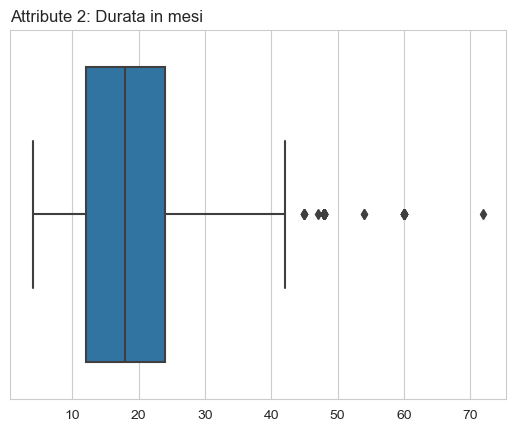

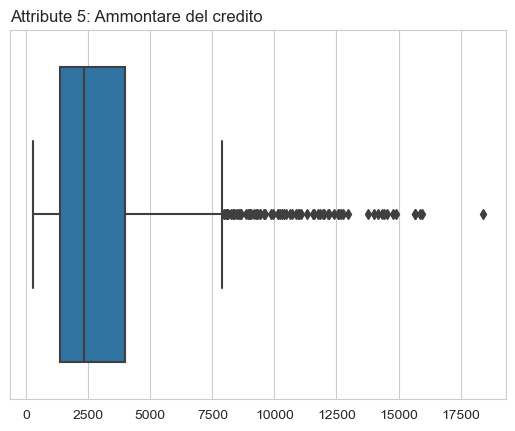

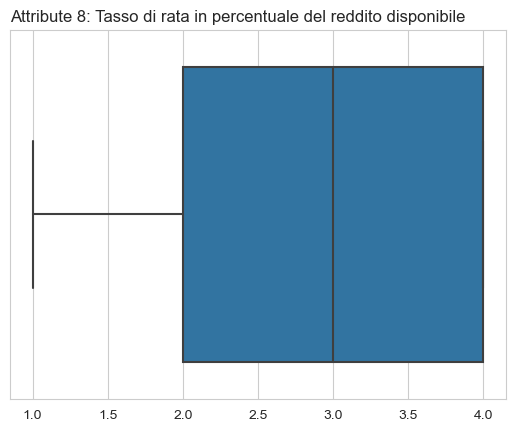

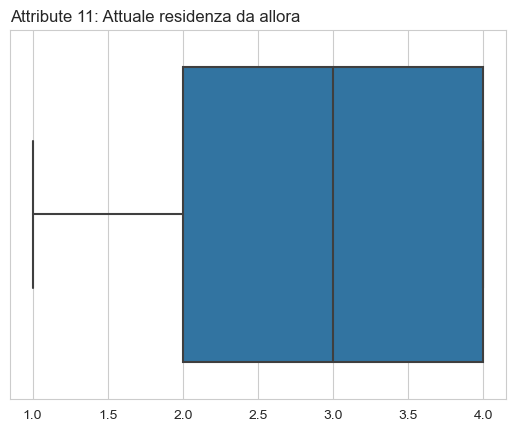

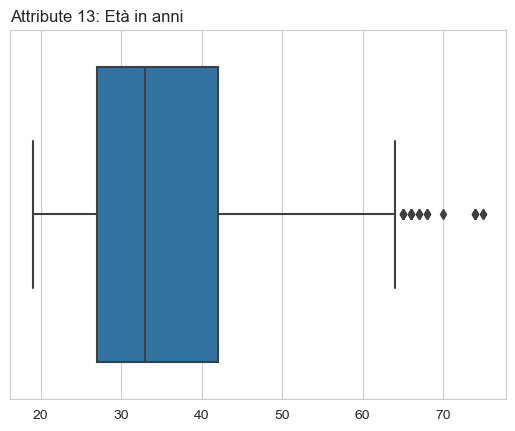

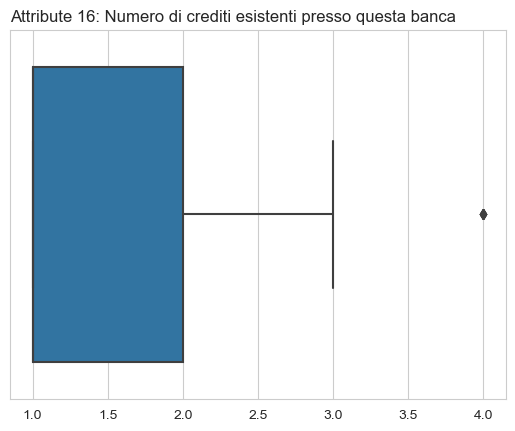

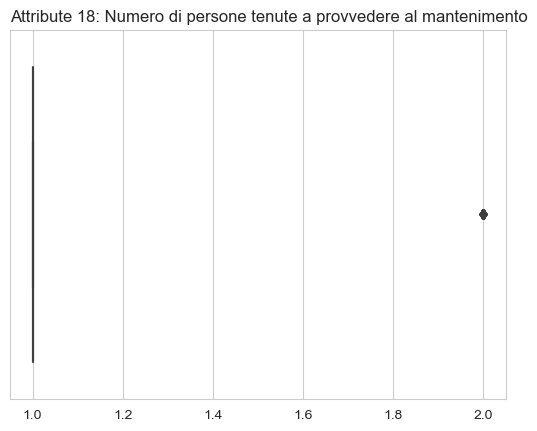

In [7]:
# Plot pie chart for every category type column
sns.set_style("whitegrid")
for i in data.select_dtypes('int').columns:
    sns.boxplot(x=data[i])
    plt.xlabel('')
    plt.title(f'Attribute {i}: {attributes_description[i]}', loc='left')
    plt.show()

#### Attributi categorici

In [8]:
# Print description for category type columns
data.select_dtypes('category').describe()

,1,3,4,6,7,9,10,12,14,15,17,19,20,21
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201,1
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


Il numero di livelli é coerente con la descrizione ad eccezione dell'attributo 9 in cui non tutti i livelli sono rappresentati

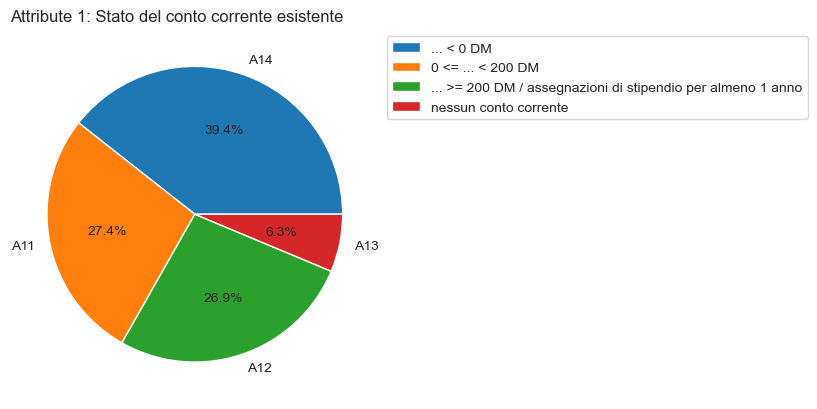

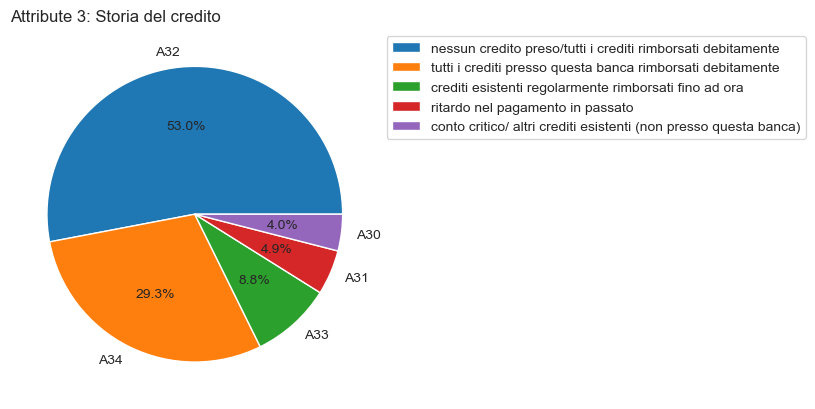

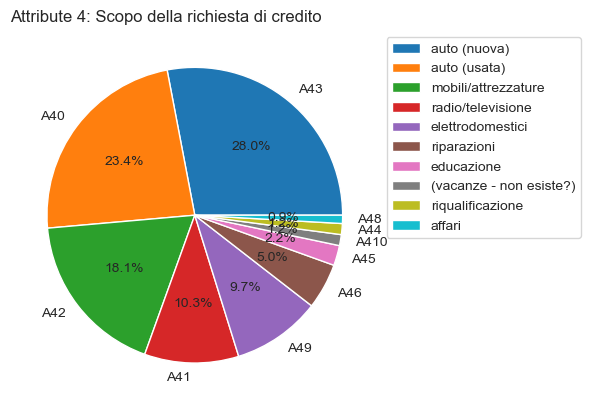

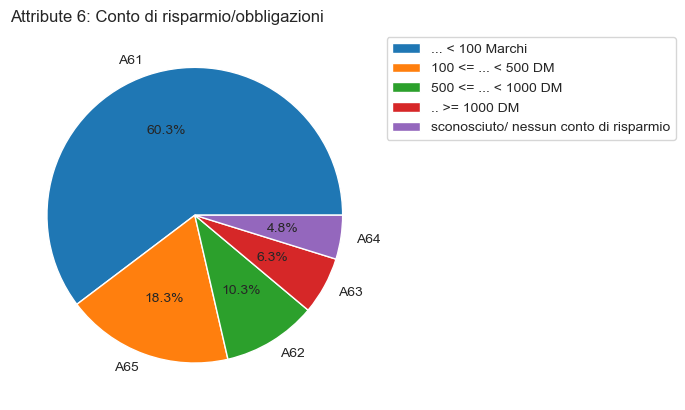

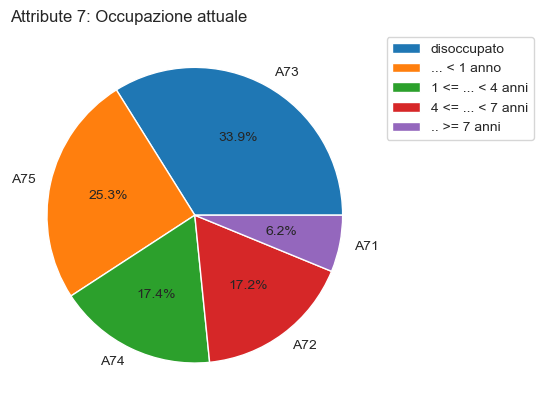

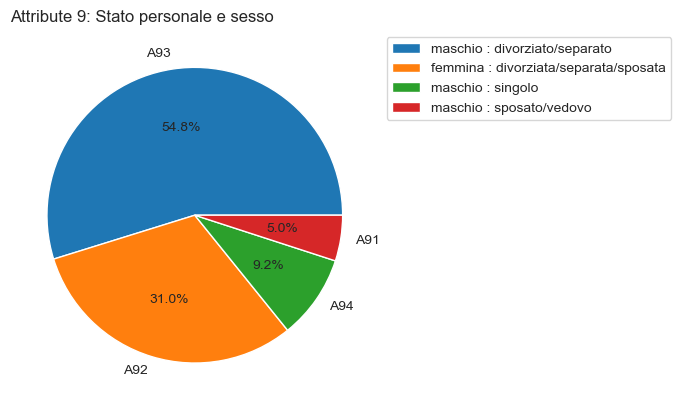

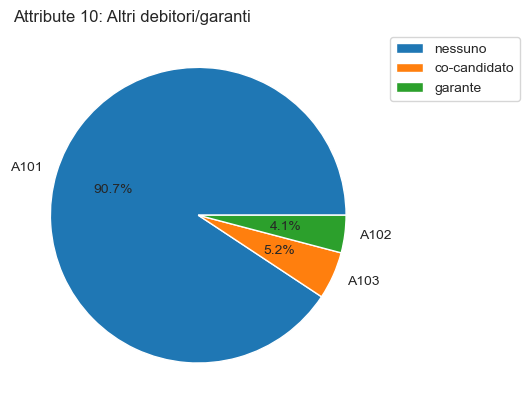

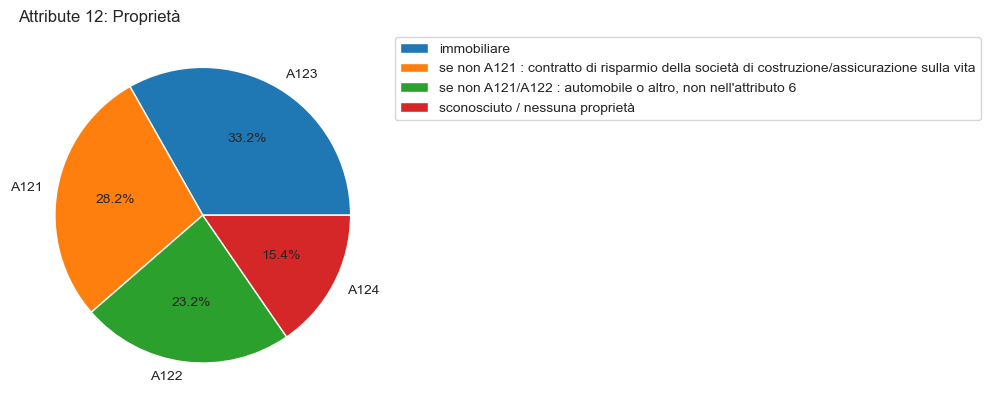

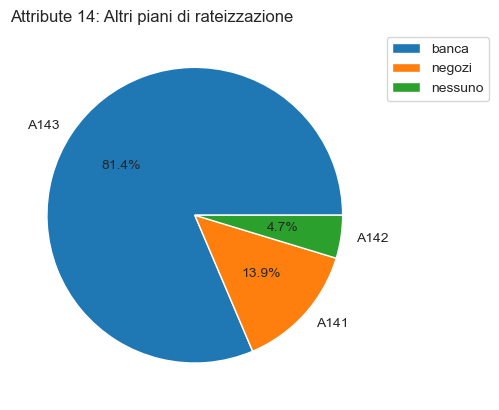

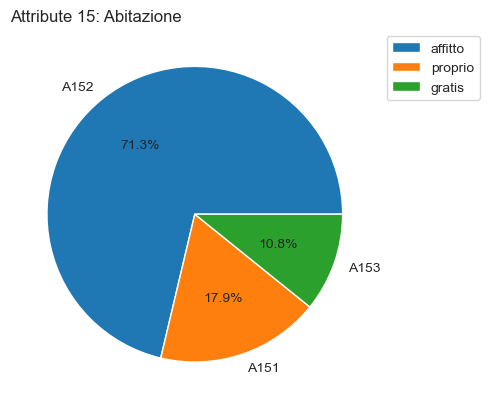

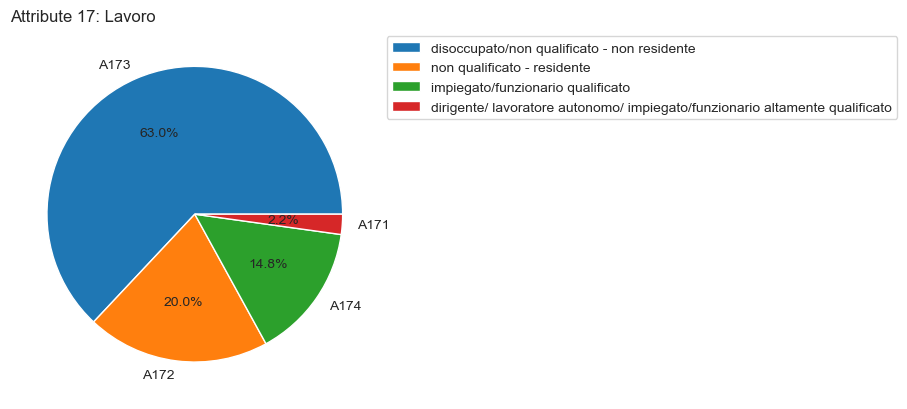

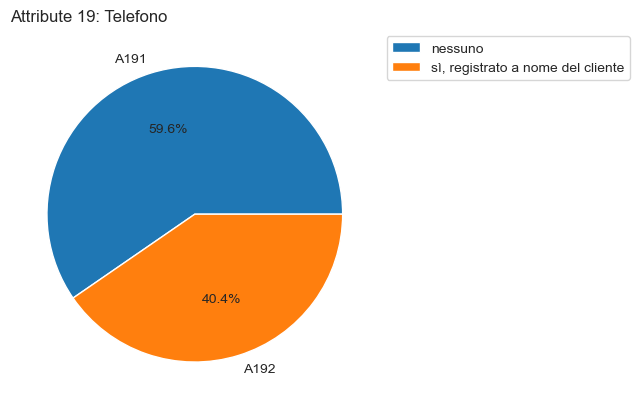

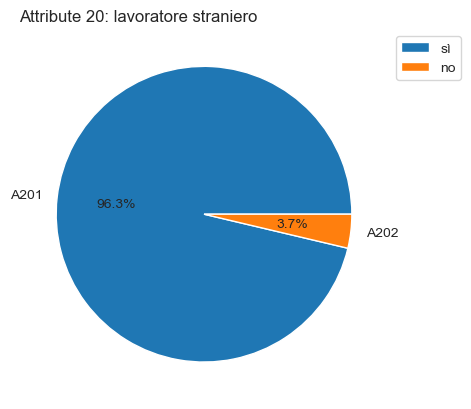

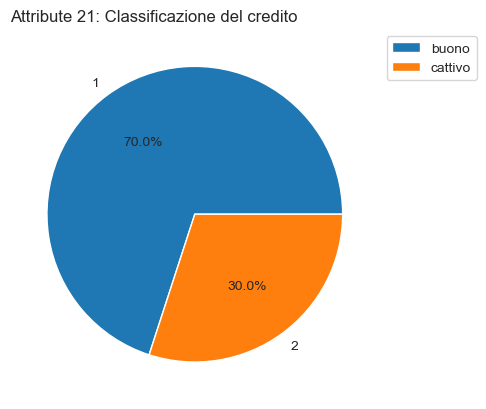

In [9]:
# Plot pie chart for every category type column

sns.set_style("white")
for i in data.select_dtypes('category').columns:
    # Count levels frequency
    temp = data[i].value_counts(normalize=True, sort=True)
    # Plot pie chart
    temp.plot.pie(autopct='%1.1f%%')
    plt.ylabel('')
    labels = levels_description[i].values()
    plt.legend(loc='upper left', labels=labels, bbox_to_anchor=(1, 1))
    plt.title(f'Attribute {i}: {attributes_description[i]}', loc='left')
    plt.show()

### Analisi multivariata

#### Relazioni tra attributi numerici

Per valutare la relazione tra ogni coppia di variabili numeriche viene effettuato il calcolo della correlazione, mediante il coefficiente di correlazione di Pearson.

Text(0.5, 1.0, 'Indice di correlazione di Pearson')

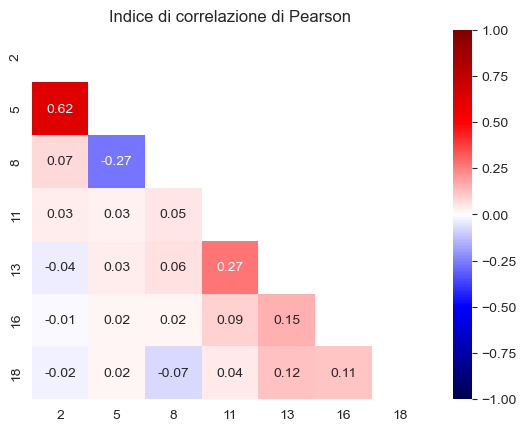

In [10]:
corr_pearson = data.corr(numeric_only=True)

mask = np.triu(corr_pearson) # triangolo inferiore
sns.heatmap(corr_pearson, annot=True, fmt=".2f", mask=mask, cmap='seismic', vmin=-1, vmax=1).set_title('Indice di correlazione di Pearson')

Dalla matrice é possibile individuare una forte correlazione tra l'attributo `Durata in mesi` e `Ammontare del credito` con un valore di 0.62 ed un paio di correlazioni piú deboli di valore assoluto 0.27 tra le coppie `Ammontare del credito` - `Tasso di rata in percentuale del reddito disponibile` e `Attuale residenza da allora` - `Età in anni`

#### Relazioni tra attributi categorici

Per il confronto fra le variabili categoriche del dataset vengono utilizzate delle tabelle di contingenza, così da poter mettere in evidenza la distribuzione congiunta di variabili di questo tipo. Inoltre, si può andare a calcolare l'indice V di Cramer per quantificare la forza di tale associazione.

Più il valore della V di Cramer è elevato, maggiore è la forza dell'associazione tra le variabili. Orientativamente, si può dire che se il valore ottenuto della V di Cramer è compreso tra 0 e 0,3 si ha una bassa associazione, da 0,3 a 0,6 si ha una buona associazione, da 0,6 a 1 si ha un'ottima associazione.

In [11]:
# Funzione per il calcolo della V di Cramer
def cramers_V(var1,var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Costruzione della tabella di contingenza
  stat = chi2_contingency(crosstab)[0] # Calcolo del Chi quadro
  obs = np.sum(crosstab) # Numero di osservazioni
  mini = min(crosstab.shape)-1 # Estrazione del valore minimo fra righe e colonne della tabella di contingenza

  return (stat/(obs*mini))

In [12]:
data_factor = data.select_dtypes(include='category').apply(lambda x: pd.factorize(x)[0]) # converto le variabili categoriche in numeriche

result=[]
for c1 in data_factor.items(): # itero sulle colonne del dataframe
    result.append([cramers_V(c1[1], c2[1]) for c2 in data_factor.items()]) # calcolo la V di Cramer per ogni coppia di variabili

corr_cramer = pd.DataFrame(result, columns = data_factor.columns, index = data_factor.columns) # creo il dataframe con i risultati

Text(0.5, 1.0, 'Indice di correlazione V di Cramer')

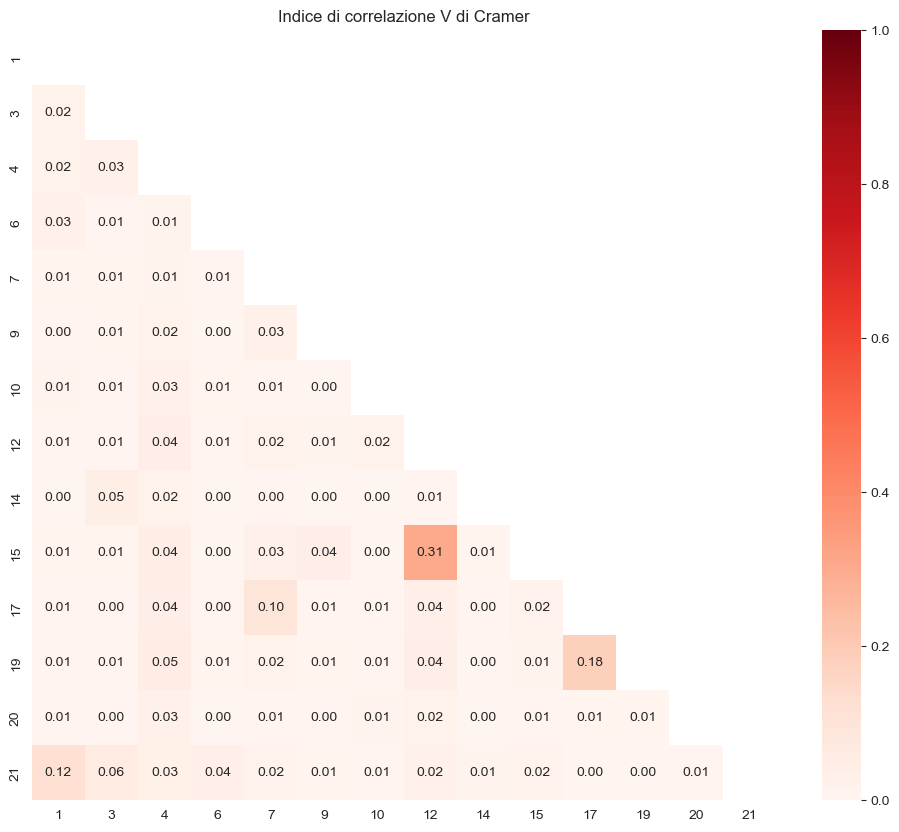

In [13]:
f, ax = plt.subplots(figsize=(12,10))
mask = np.triu(corr_cramer) # mantenere solo il triangolo inferiore
sns.heatmap(corr_cramer, annot=True, fmt=".2f", mask=mask, cmap='Reds', vmin=0, vmax=1, ).set_title('Indice di correlazione V di Cramer')

Dal grafico é mostrata una discreta dipendenza tra gli attributi `Proprietà` e `Abitazione` dal valore di 0.31, ed una piú debole tra gli attributi `Lavoro` e `Telefono`.

Di seguito viene riportato un dettaglio della tabella di contingenza per la  coppia di attributi con la correlazione maggiore. 

Livelli di proprieta:
- 'A121': 'immobiliare',
- 'A122': 'se non A121 : contratto di risparmio della società di costruzione/assicurazione sulla vita',
- 'A123': "se non A121/A122 : automobile o altro, non nell'attributo 6",
- 'A124': 'sconosciuto / nessuna proprietà'

Livelli di abitazione:
- 'A151': 'affitto',
- 'A152': 'proprio',
- 'A153': 'gratis'

In [14]:
c_table = pd.crosstab(data[12], data[15], margins = False)
c_table

15,A151,A152,A153
12,,,
A121,55,226,1
A122,46,184,2
A123,60,271,1
A124,18,32,104


Cio che si nota é che la correlazione é dovuta quasi totalmente alla modalitá `A124` con `A153`

#### Relazioni tra attributi numerici e categorici

Infine, per mettere in mostra la possibile relazione fra variabili numeriche e categoriche vengono utilizzati dei box-plot condizionati.

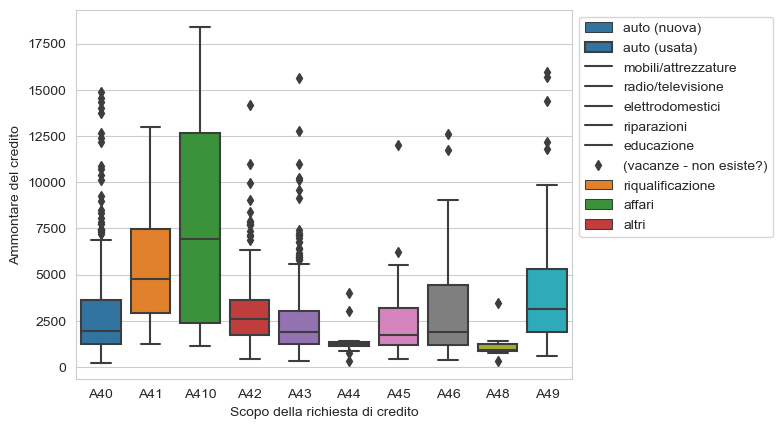

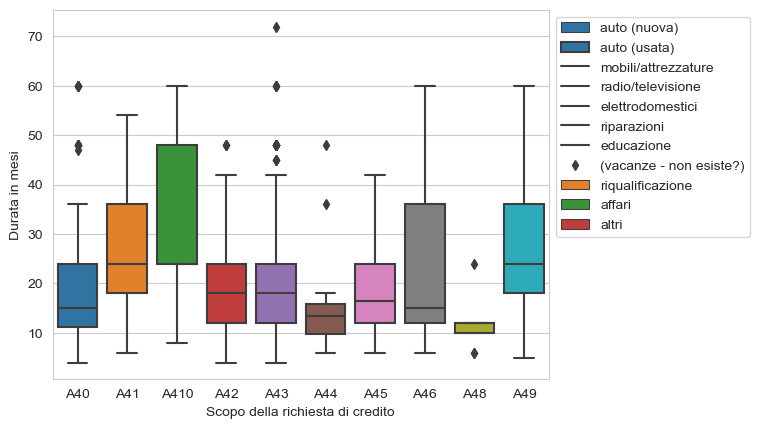

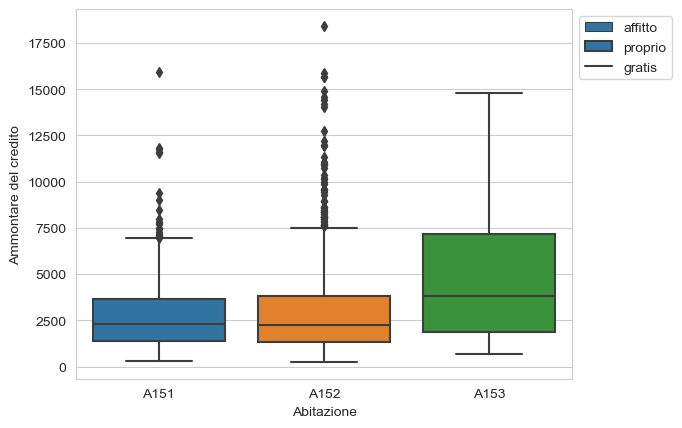

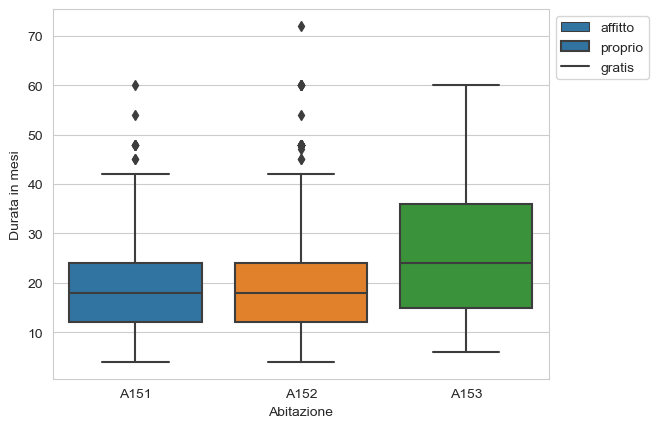

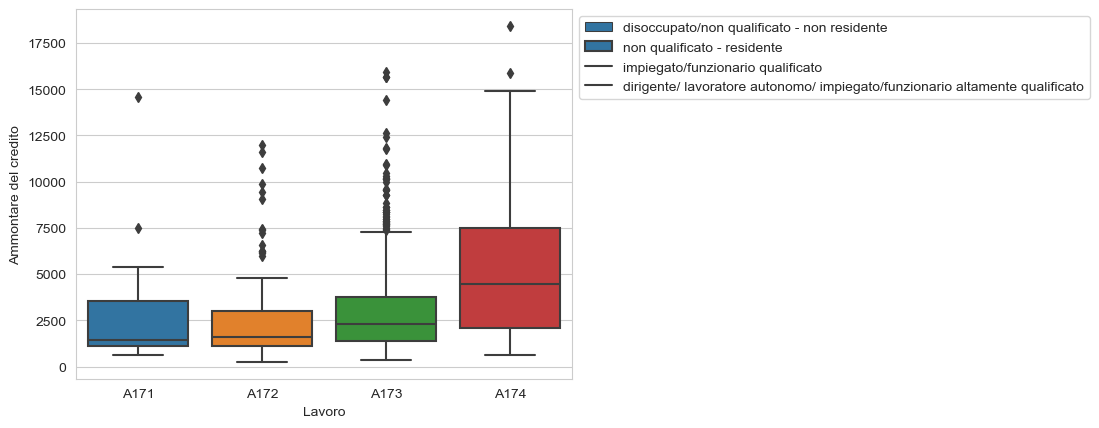

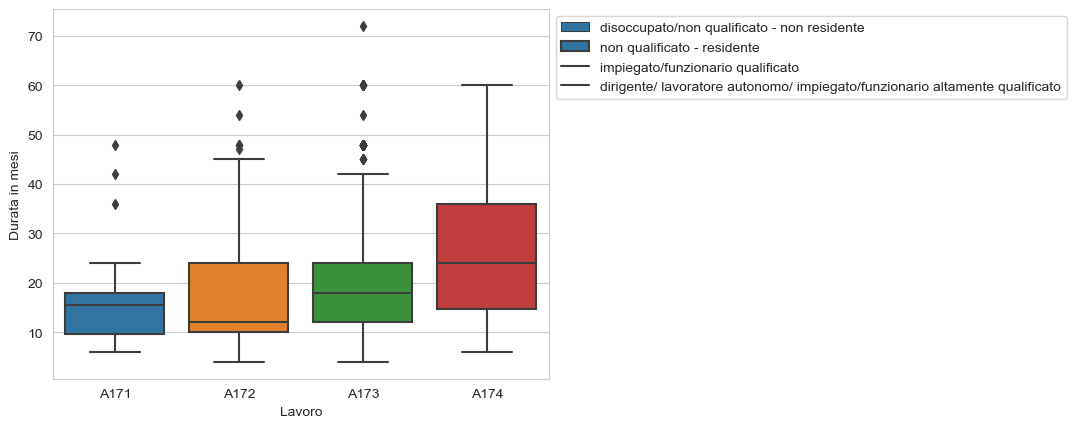

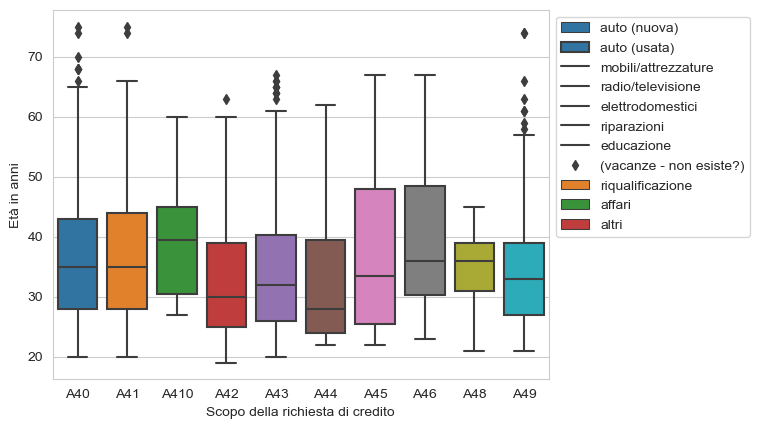

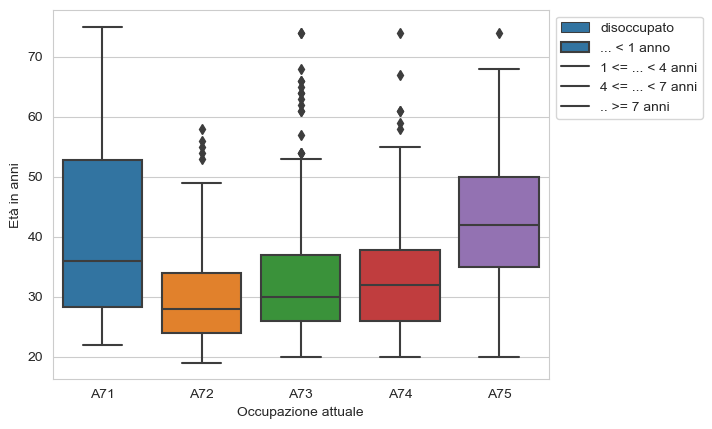

In [15]:
pairs = list(product(data.select_dtypes(include='category').columns, data.select_dtypes(include='int').columns))
pairs = [(4,5), (4,2), (15,5), (15,2), (17,5), (17,2), (4,13), (7,13)] # salienti

sns.set_style("whitegrid")
# Plot pie chart for every category type column
for i in pairs:
    ax = sns.boxplot(x=i[0], y=i[1], data=data, hue=i[0], dodge=False)
    
    plt.ylabel(attributes_description[i[1]])
    plt.xlabel(attributes_description[i[0]])
    labels = levels_description[i[0]].values()
    plt.legend(loc='upper left', labels=labels, bbox_to_anchor=(1, 1))
    plt.show()

#### Relazione con variabile target

In questa sezione viene fatta un'analisi multivariata piú approfondita tra i 20 attributi e la variabile target nel task di classificazione.

##### Attributi numerici

<Axes: title={'center': 'Correlazione con variabile target'}>

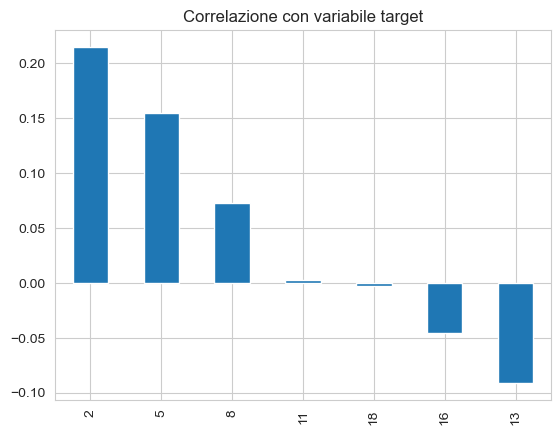

In [16]:
# Correlazione con variabile target
data.drop(21, axis=1).corrwith(data[21], numeric_only=True).sort_values(ascending=False).plot(kind='bar', grid=True, title="Correlazione con variabile target")

Gli attributi che mostrano una correlazione maggiore sono `Durata in mesi`, `Ammontare del credito` e `Età in anni`. Di seguito viene graficato un dettaglio per per livello di questi 3 attributi.

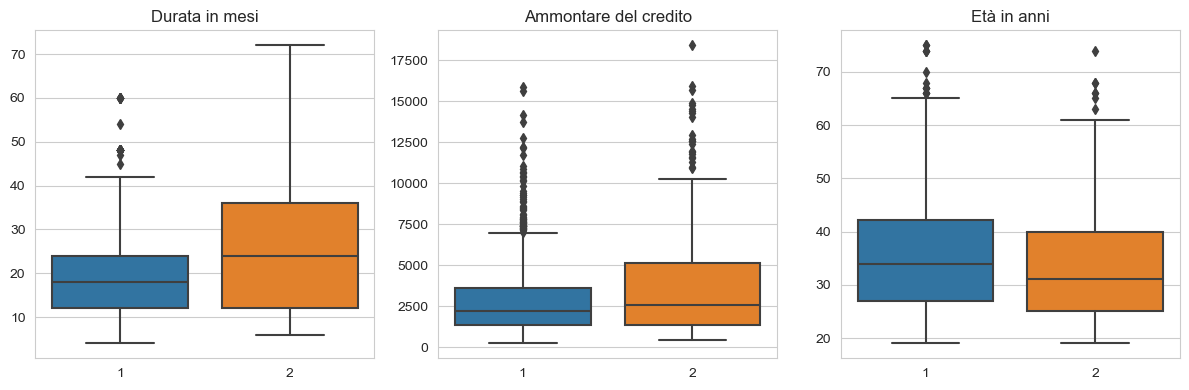

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

lista = [2, 5, 13]

# Mostra ogni variabile categorica rispetto all'attributo target
for i, var in enumerate(lista):
    sns.boxplot(x=21, y=var, data=data, ax=axes[i])
    axes[i].set_title(attributes_description[var])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Come visto dal valore della correlazione la `durata in mesi` é quella che presenta dipendenza maggiore. L'attributo `eta in anni` invece é l'unico dei tre che ha correlazione negativa.

##### Attributi categorici

Di seguito vengono mostrati gli istogrammi con i conteggi per modalitá della variabile target

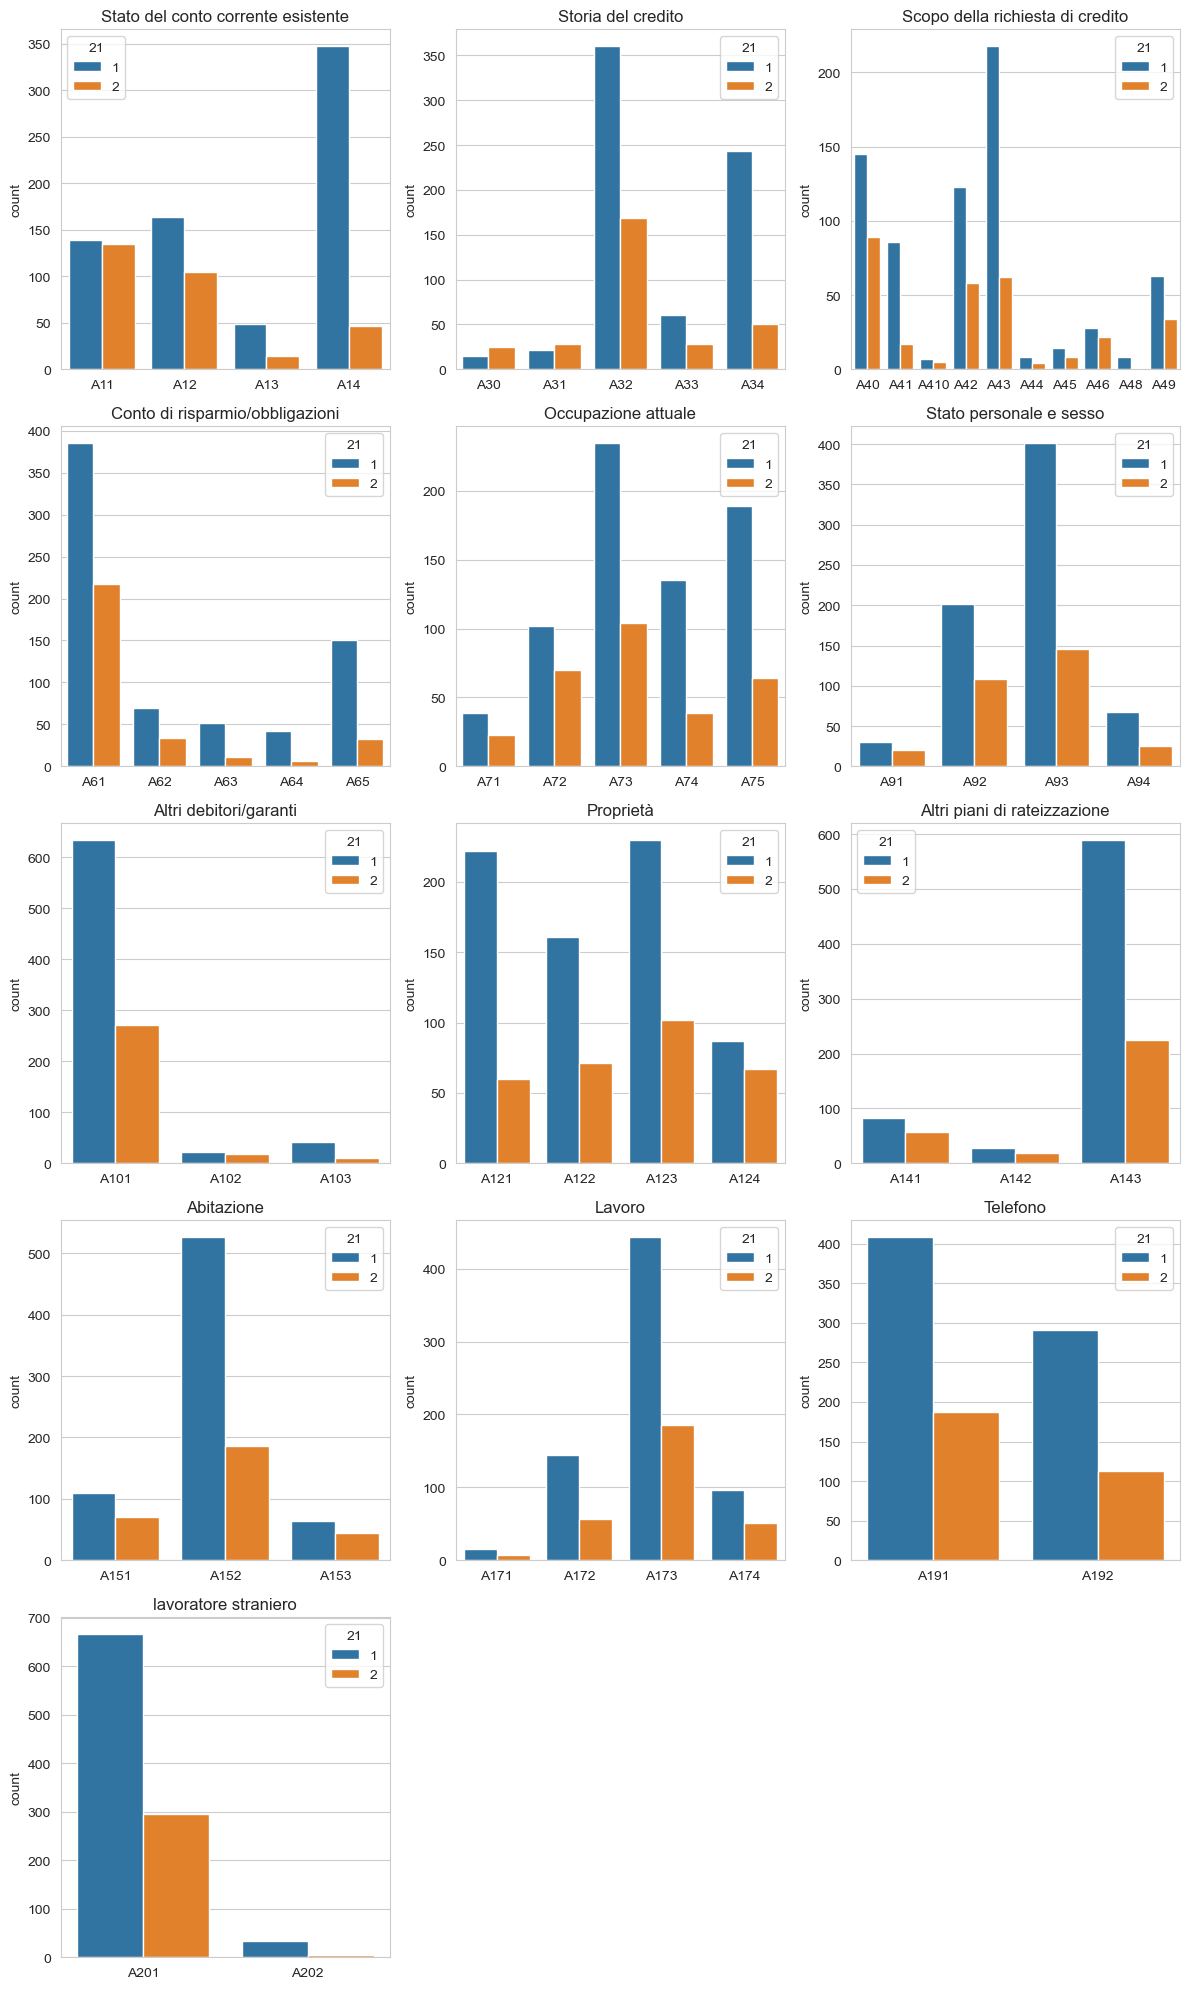

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 20))

# Mostra ogni variabile categorica rispetto all'attributo target
for i, var in enumerate(data.drop(21, axis=1).select_dtypes(include='category').columns):
    row = i // 3  # Calcolo l'indice di riga
    col = i % 3   # Calcolo l'indice di colonna

    sns.countplot(x=var, hue=21, data=data, ax=axes[row, col])
    axes[row, col].set_title(attributes_description[var])
    axes[row, col].set_xlabel('')

# Cancello il grafico in eccesso
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][1])

plt.tight_layout()
plt.show()

- 1: 'buono',
- 2: 'cattivo'

Alcune cose da segnalare. Si nota una quantità molto bassa di label 2 (classificazione credito "cattivo") per osservazioni il cui status corrisponde alla modalità A14 ("nessun conto corrente"). Anche rispetto all'attributo storia, la quantità di label rispetto alla modalità A34 ("conto critico/ altri crediti esistenti (non presso questa banca)") è bassa, nonostante per conto critico si sia portati a pensare che la classificazione del credito debba essere cattiva. Per il resto, la proporzione fra label 1 e 2 segue a grandi linee la distribuzione dei dati fra le diverse modalità degli attributi.